In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression

In [5]:
%load_ext autoreload
%autoreload 2
from functions import loaddata, MACD, RSI
from portfolio import Portfolio

In [158]:
residual_return = loaddata("r_ti2", 20180101, 20180115)
def fun(x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    else:
        return 2

price_gain_loss = residual_return.map(func=fun, na_action="ignore")
price_gain_loss = price_gain_loss.iloc[:, 1:]

resid = residual_return.iloc[:, :-1]*100

test = loaddata("r_ti1", 20180101, 20180115)
overnight_resid = test.iloc[:, 1:]*100


In [159]:

x1 = overnight_resid.to_numpy().flatten()
x2 = resid.to_numpy().flatten()
y_ = (residual_return.iloc[:, 1:]*100).to_numpy().flatten()
y = price_gain_loss.to_numpy().flatten()

datas = pd.DataFrame({'X1': x1, 'X2': x2, 'Y_': y_, 'Y': y})
new = datas.dropna()
new = new[new["Y"] < 2]
X_train = new[["X1","X2"]]
temp = new["Y_"]
y_train = new["Y"]
y_train.to_numpy().astype(int)

array([0, 1, 0, ..., 1, 0, 1])

In [160]:
print(X_train.size)
print(temp.size)
print(y_train.size)

57372
28686
28686


In [161]:
def phi(X): 
    return X**2

In [164]:
X_ = phi(X_train)
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

#print(price_gain_loss.head())
#print(test.head())
#for x in price_gain_loss.index:
    #print(price_gain_loss.loc[x, :].value_counts(dropna=False))


0.5243324269678589

/Users/jameshetherington/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[Text(0, 0.5, '$x_2$')]

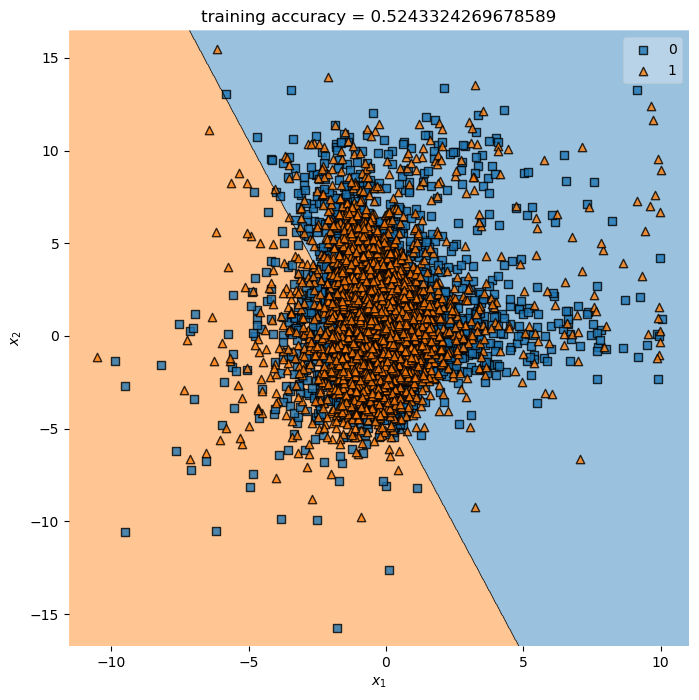

In [165]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(1, 1, figsize = (8, 8), sharex = True, sharey = True)

plot_decision_regions(X_train.to_numpy(), y_train.to_numpy().astype(int), clf = LR)
score = ax.set_title(f"training accuracy = {LR.score(X_train, y_train)}")
ax.set(xlabel = r"$x_1$")
ax.set(ylabel = r"$x_2$")

In [103]:
day1 = 20180117
day2 = 20180118
residual_return_test = loaddata("r_ti2", day1, day1)
resid_test = residual_return_test*100

on_test = loaddata("r_ti1", day2, day2)
overnight_resid_test = on_test*100

price_test1 = loaddata("mid_close", day1, day1).to_numpy().flatten()
price_test2 = loaddata("mid_close", day2, day2).to_numpy().flatten()

x1_test = overnight_resid_test.to_numpy().flatten()
x2_test = resid_test.to_numpy().flatten()

data_test = pd.DataFrame({'X1': x1_test, 'X2': x2_test, "Prices_day1": price_test1, "Prices_day2": price_test2,})
new_test = data_test.dropna()
X_test = new_test[["X1","X2"]]


predictions = LR.predict(X_test)
predictions.astype(int)

array([0, 0, 0, ..., 1, 1, 1])

In [132]:
inds = [i for i in range(len(predictions))]
dummy = [2 for i in range(len(predictions))]

In [133]:
pand = pd.DataFrame({"pred": dummy, "price": new_test["Prices_day1"], "asset_index": inds})
port = Portfolio(inds, 10000)
port.update(pand)
print(port.holdings)
pand1 = pd.DataFrame({"pred": dummy, "price": new_test["Prices_day2"], "asset_index": inds})
port.update(pand1)
port.value

      asset_index  holdings position
0               0       0.0     LONG
1               1       0.0     LONG
2               2       0.0     LONG
3               3       0.0     LONG
4               4       0.0     LONG
...           ...       ...      ...
3233         3233       0.0     LONG
3234         3234       0.0     LONG
3235         3235       0.0     LONG
3236         3236       0.0     LONG
3237         3237       0.0     LONG

[3238 rows x 3 columns]


9972.789999485016

In [6]:
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    else:
        return 2
    
def my_log(x):
    if x != 0 and np.isnan(x) == False:
        return np.log(x)
    else:
        return x

In [7]:
start_date = 20180101
end_date = 20190101
rtxm_ti2 = loaddata("rtxm_ti2", start_date, end_date)
rtxm_ti1 = loaddata("rtxm_ti1", start_date, end_date)
r_ti2 = loaddata("r_ti2", start_date, end_date)
volume = loaddata("volall_day", start_date, end_date)
mid_close = loaddata("mid_close", start_date, end_date)

In [8]:
LR = LogisticRegression()
#for i in range(mid_close.shape[0]):
for i in range(1000):
    price_i = mid_close.iloc[i]

    overnight_i = rtxm_ti1.iloc[i, 1:]
    intraday_i = rtxm_ti2.iloc[i,:-1]
    volume_i = volume.iloc[i, :-1].map(lambda x: my_log(x), na_action="ignore")

    rsi_10 = RSI(rtxm_ti2.iloc[i], 10)[:-1]
    rsi_12 = RSI(rtxm_ti2.iloc[i], 12)[:-1]
    rsi_14 = RSI(rtxm_ti2.iloc[i], 14)[:-1]

    macd_50_20_10 = MACD(price_i, 50, 20, 10)[:-1]
    macd_26_12_9 = MACD(price_i, 26, 12, 9)[:-1]
    macd_20_10_8 = MACD(price_i, 20, 10, 8)[:-1]
    
   
    y = r_ti2.iloc[i, 1:].map(lambda x: sign(x), na_action="ignore")
    #print(volume_i)
    #print(overnight_i.shape, intraday_i.shape, volume_i.shape, rsi_10.shape, rsi_12.shape, rsi_14.shape, macd_20_10_8.shape, macd_26_12_9.shape, macd_50_20_10.shape , y.shape)


    data = {'X1': np.array(overnight_i), 'X2': np.array(intraday_i), "X3": np.array(volume_i), 
            "X4": np.array(rsi_10), "X5": np.array(rsi_12), "X6": np.array(rsi_14),
            "X7": np.array(macd_20_10_8), "X8": np.array(macd_26_12_9), "X9": np.array(macd_50_20_10),
            "Y": np.array(y)}

    data_train = pd.DataFrame(data)
    new_train = data_train.dropna()
    X_train = new_train[["X1","X2","X3","X4","X5","X6","X7","X8","X9"]]  
    y_train = new_train[["Y"]]

    #print(X_train.shape)
    if X_train.shape[0] != 0:
        LR.fit(X_train, np.ravel(y_train))

    
   

/Users/jameshetherington/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jameshetherington/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [10]:
chk = []
for i in range(1000):
    price_i_test = mid_close.iloc[i]

    overnight_i_test = rtxm_ti1.iloc[i, 1:]
    intraday_i_test = rtxm_ti2.iloc[i,:-1]
    volume_i_test = volume.iloc[i, :-1].map(lambda x: my_log(x), na_action="ignore")

    rsi_10_test = RSI(rtxm_ti2.iloc[i], 10)[:-1]
    rsi_12_test = RSI(rtxm_ti2.iloc[i], 12)[:-1]
    rsi_14_test = RSI(rtxm_ti2.iloc[i], 14)[:-1]

    macd_50_20_10_test = MACD(price_i_test, 50, 20, 10)[:-1]
    macd_26_12_9_test = MACD(price_i_test, 26, 12, 9)[:-1]
    macd_20_10_8_test = MACD(price_i_test, 20, 10, 8)[:-1]


    y_test = r_ti2.iloc[i, 1:].map(lambda x: sign(x), na_action="ignore")
        #print(volume_i)
        #print(overnight_i.shape, intraday_i.shape, volume_i.shape, rsi_10.shape, rsi_12.shape, rsi_14.shape, macd_20_10_8.shape, macd_26_12_9.shape, macd_50_20_10.shape , y.shape)


    data_test = {'X1': np.array(overnight_i_test), 'X2': np.array(intraday_i_test), "X3": np.array(volume_i_test), 
        "X4": np.array(rsi_10_test), "X5": np.array(rsi_12_test), "X6": np.array(rsi_14_test),
        "X7": np.array(macd_20_10_8_test), "X8": np.array(macd_26_12_9_test), "X9": np.array(macd_50_20_10_test),
        "Y": np.array(y_test)}

    data_test = pd.DataFrame(data_test)
    new_test = data_test.dropna()
    X_test = new_test[["X1","X2","X3","X4","X5","X6","X7","X8","X9"]]  
    y_test = new_test[["Y"]]
    if X_test.shape[0] > 0:
        chk.append((LR.score(X_test, y_test), X_test.shape[0]))

print(LR.score(X_test, y_test))
print(LR.coef_)
#print(LR.predict(X_test))



0.6244725738396625
[[-0.63881232  0.09164943  0.43718307 -0.24490854  0.30085366 -0.07203035
   0.17451543  0.10155893  0.0067653 ]]


In [13]:
X_test

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,0.022281,-0.019439,16.026577,4.664339,4.664339,4.664339,0.000000,0.000000,0.000000
1,-0.016963,-0.014284,16.673208,2.799266,2.799266,2.799266,0.002297,0.002094,0.001418
2,0.030242,0.014132,16.329814,30.351190,30.351190,30.351190,0.000305,0.000351,0.000314
3,-0.016257,0.037089,17.188784,60.062319,60.062319,60.062319,0.024510,0.022171,0.014711
9,-0.022352,-0.050939,17.019018,50.460736,50.460736,50.460736,-0.033752,-0.027909,-0.015813
...,...,...,...,...,...,...,...,...,...
237,0.005101,-0.012876,15.885129,53.532693,54.673066,55.509138,-0.032678,-0.045217,-0.052760
238,0.016663,-0.012791,15.759456,46.475358,49.004325,50.823164,-0.030610,-0.043904,-0.054226
239,-0.008072,-0.014061,16.159772,40.029909,43.585188,46.205684,-0.023527,-0.037629,-0.051908
240,-0.020771,0.021067,15.956964,51.278470,52.221106,53.083378,-0.010602,-0.025298,-0.044635


In [12]:
print( max(chk), min(chk))
chk


(0.6521739130434783, 23) (0.3333333333333333, 21)


[(0.49583333333333335, 240),
 (0.5083333333333333, 240),
 (0.5041322314049587, 242),
 (0.4462809917355372, 242),
 (0.5041322314049587, 242),
 (0.4214876033057851, 242),
 (0.4375, 240),
 (0.3880597014925373, 67),
 (0.4550898203592814, 167),
 (0.49586776859504134, 242),
 (0.4596774193548387, 124),
 (0.49173553719008267, 242),
 (0.512396694214876, 242),
 (0.4669421487603306, 242),
 (0.5165289256198347, 242),
 (0.4132231404958678, 242),
 (0.5826446280991735, 242),
 (0.45041322314049587, 242),
 (0.44214876033057854, 242),
 (0.48, 175),
 (0.5166666666666667, 240),
 (0.48760330578512395, 242),
 (0.4297520661157025, 242),
 (0.45454545454545453, 242),
 (0.49586776859504134, 242),
 (0.5206611570247934, 242),
 (0.47107438016528924, 242),
 (0.5, 242),
 (0.45041322314049587, 242),
 (0.42916666666666664, 240),
 (0.49166666666666664, 240),
 (0.4397905759162304, 191),
 (0.4834710743801653, 242),
 (0.4834710743801653, 242),
 (0.5291479820627802, 223),
 (0.47520661157024796, 242),
 (0.5083333333333333, 